<a href="https://colab.research.google.com/github/juliaNogueiraC/Previsao-de-Necessidade-de-Contratacoes/blob/main/Previs%C3%A3o_de_Necessidade_de_Contrata%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Definir parâmetros
np.random.seed(42)
departments = ['Sales', 'Engineering', 'HR', 'Finance', 'Marketing']
years = np.arange(2010, 2024)

# Criar combinações de departamentos e anos
data = {
    'Year': np.repeat(years, len(departments)),
    'Department': np.tile(departments, len(years)),
    'Retirements': np.random.randint(0, 10, len(years) * len(departments)),
    'Resignations': np.random.randint(0, 20, len(years) * len(departments)),
    'Layoffs': np.random.randint(0, 5, len(years) * len(departments)),
    'NewPositions': np.random.randint(0, 15, len(years) * len(departments)),
    'Hires': np.random.randint(0, 30, len(years) * len(departments))
}

# Criar DataFrame
df = pd.DataFrame(data)

# Agrupar por ano e somar as demissões por departamento
df_summary = df.groupby(['Year', 'Department']).sum().reset_index()

# Salvar DataFrame em um arquivo CSV
df_summary.to_csv('hiring_data_summary.csv', index=False)

# Exibir primeiras linhas do DataFrame resumido
print(df_summary.head(20))


    Year   Department  Retirements  Resignations  Layoffs  NewPositions  Hires
0   2010  Engineering            3            15        4             3      1
1   2010      Finance            4            17        3             9      2
2   2010           HR            7            12        3             2     21
3   2010    Marketing            6            14        3             2     15
4   2010        Sales            6             7        0            10     17
5   2011  Engineering            2             8        3             2      8
6   2011      Finance            7            12        1             6      0
7   2011           HR            6            14        2             3      3
8   2011    Marketing            4             0        3             3      3
9   2011        Sales            9            12        3            14     28
10  2012  Engineering            7             8        0             0     13
11  2012      Finance            2            11    

In [ ]:
# Verificar informações básicas do DataFrame
print(df.info())

# Verificar se há valores ausentes
print(df.isnull().sum())

# Preencher ou remover valores ausentes se necessário
# df = df.dropna() # exemplo de remoção
# df = df.fillna(method='ffill') # exemplo de preenchimento

# Verificar estatísticas descritivas
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          70 non-null     int64 
 1   Department    70 non-null     object
 2   Retirements   70 non-null     int64 
 3   Resignations  70 non-null     int64 
 4   Layoffs       70 non-null     int64 
 5   NewPositions  70 non-null     int64 
 6   Hires         70 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 4.0+ KB
None
Year            0
Department      0
Retirements     0
Resignations    0
Layoffs         0
NewPositions    0
Hires           0
dtype: int64
              Year  Retirements  Resignations    Layoffs  NewPositions  \
count    70.000000    70.000000     70.000000  70.000000     70.000000   
mean   2016.500000     4.714286      8.328571   1.757143      6.042857   
std       4.060235     2.777460      5.380376   1.418672      4.136917   
min    2010.000000     0.00000

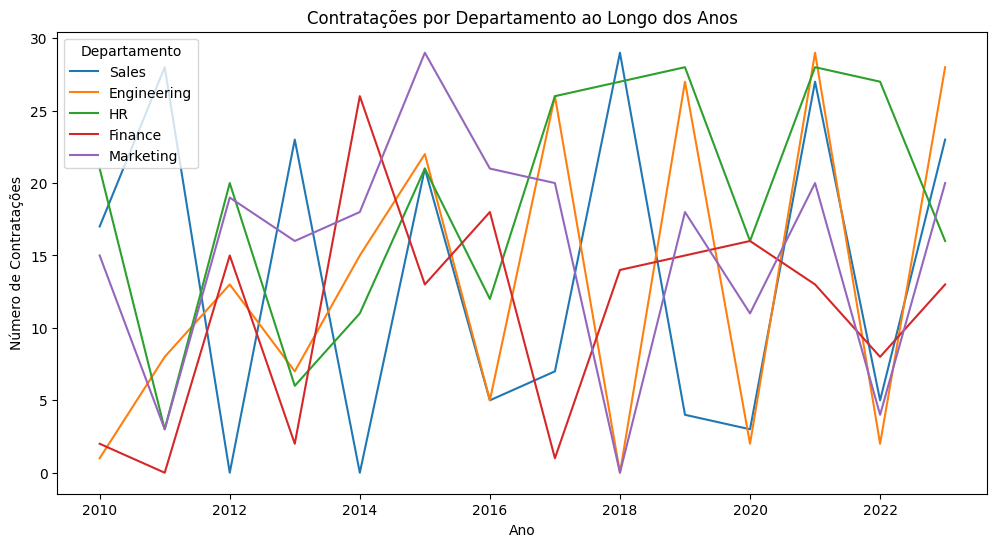

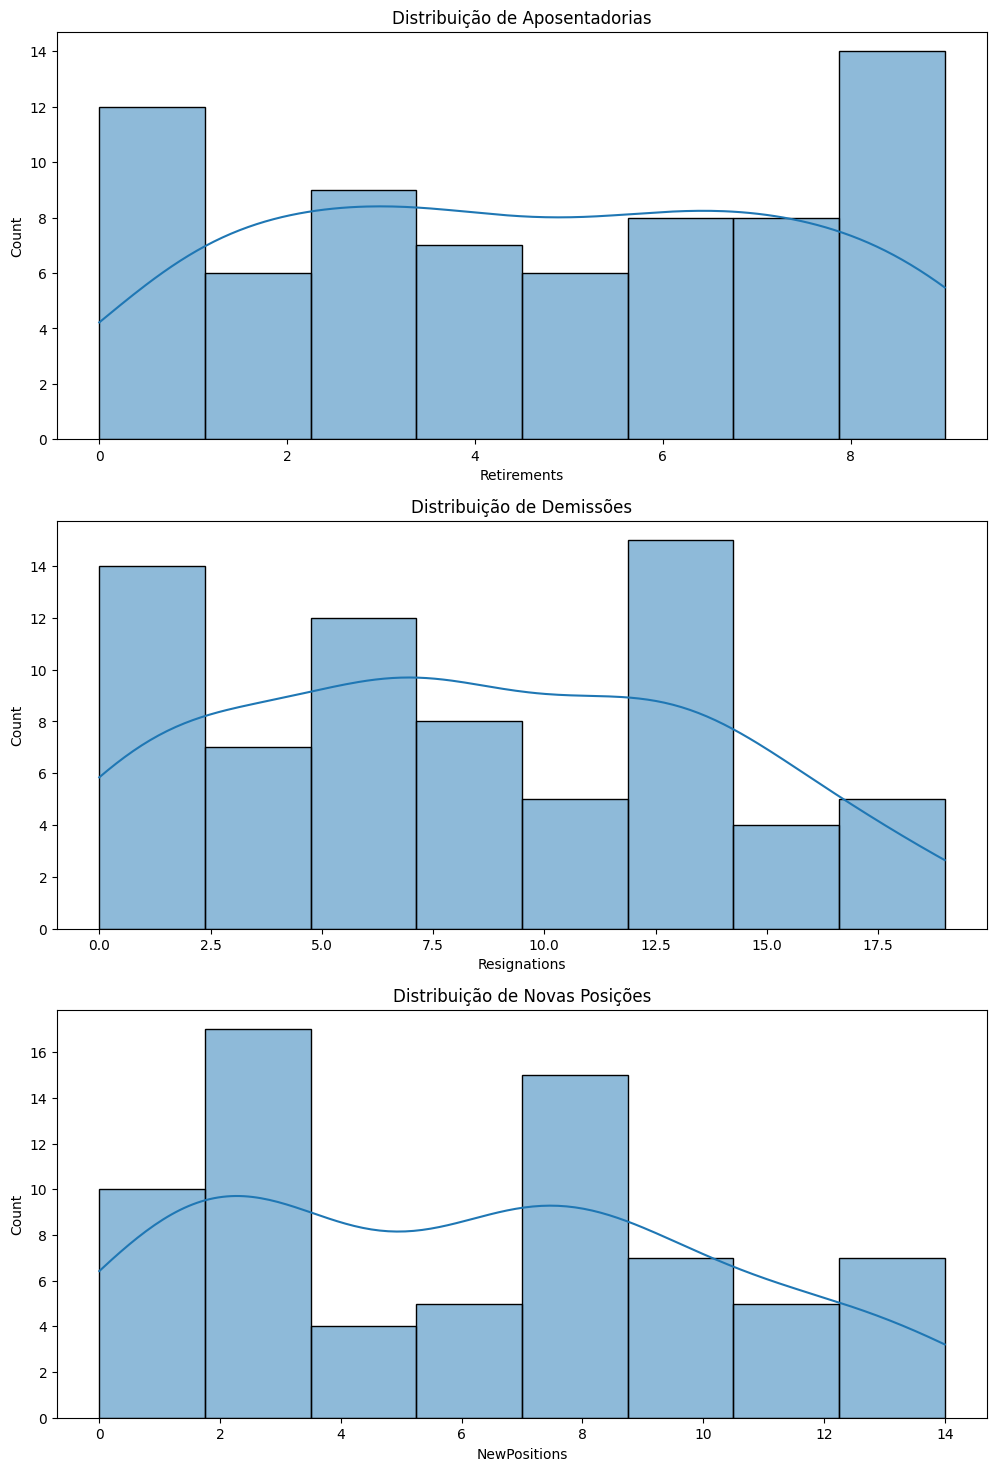

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contratações por departamento ao longo dos anos
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Hires', hue='Department')
plt.title('Contratações por Departamento ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Contratações')
plt.legend(title='Departamento')
plt.show()

# Distribuição de aposentadorias, demissões e novas posições
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
sns.histplot(data=df, x='Retirements', kde=True, ax=axes[0])
axes[0].set_title('Distribuição de Aposentadorias')
sns.histplot(data=df, x='Resignations', kde=True, ax=axes[1])
axes[1].set_title('Distribuição de Demissões')
sns.histplot(data=df, x='NewPositions', kde=True, ax=axes[2])
axes[2].set_title('Distribuição de Novas Posições')
plt.show()


In [ ]:
# Criar nova característica: Total de Saídas
df['TotalExits'] = df['Retirements'] + df['Resignations'] + df['Layoffs']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Selecionar características e variável alvo
X = df[['Year', 'Department', 'Retirements', 'Resignations', 'Layoffs', 'NewPositions', 'TotalExits']]
y = df['Hires']

# Converter variáveis categóricas para variáveis dummy
X = pd.get_dummies(X, columns=['Department'], drop_first=True)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 8.682142857142859


    Real  Previsto
22    11     17.13
0     17     12.67
49    18     12.29
4     15      9.17
54    11     19.38


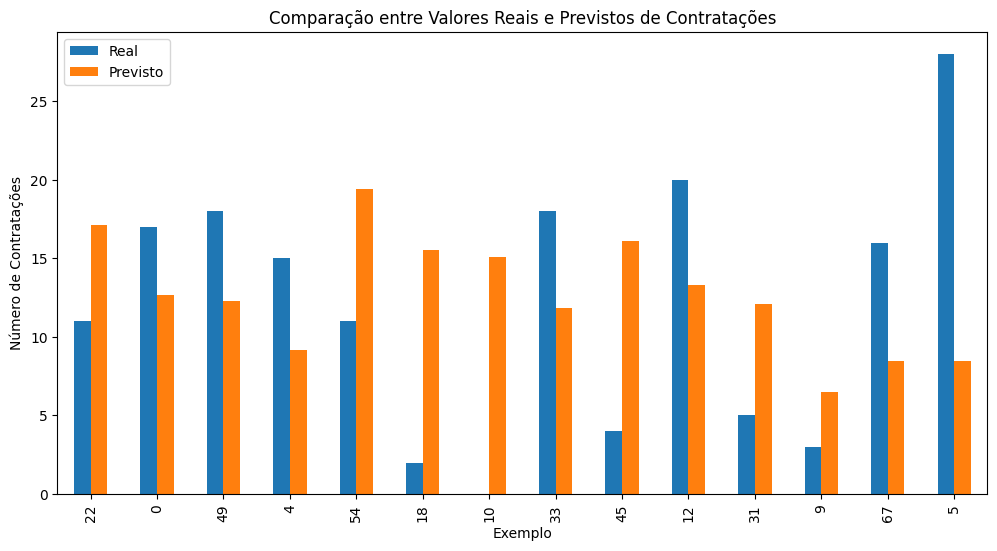

In [ ]:
# Comparar previsões com valores reais
results = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})
print(results.head())

# Gráfico de barras comparando valores reais e previstos
results.plot(kind='bar', figsize=(12, 6))
plt.title('Comparação entre Valores Reais e Previstos de Contratações')
plt.xlabel('Exemplo')
plt.ylabel('Número de Contratações')
plt.show()
